In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_OF_segment1_workflowS1_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,1126888|499828|767443,Submit,Submit,17/7/2019 1:01:31,PADWYER,Academic Services,24,N,1. App to Assessment,Part 1 - Application ID Workflow,...,MCW,HDCW,Full Degree,OF,OF,Y,NaN,Y,29 days 12 hours 51 minutes 40 seconds,2551900.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Awaiting External Response - Appointment of authorised representative',
 'AR - Awaiting External Response - Further information (1)',
 'AR - Created - Academic referee reports (Staff only)',
 'AR - Created - Academic results for prior tertiary studies',
 'AR - Created - Academic transcript Grading Scheme',
 'AR - Created - Academic transcripts for prior tertiary studies',
 'AR - Created - Academic transcripts incomplete',
 'AR - Created - Advanced Standing',
 'AR - Created - Advanced standing application',
 'AR - Created - Agent Forms: Missing both Forms',
 'AR - Created - Any other information',
 'AR - Created - Appointment of authorised representative',
 'AR - Created - Assessment information (Coursework) (1)',
 'AR - Created - Assessment information (Coursework) (2)',
 'AR - Created - Assessment information (Coursework) (3)',
 'AR - Created - CHESICC transcript authentication for international students',
 'AR - Created - Credit for previous study',
 'AR - Created - Credit for

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

12778

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,AR - Not Satisfied - Current enrolment at the University of Melbourne,AR - Not Satisfied - Is your undergraduate degree from a recognised institution and in the same stream as your intended Master of Engineering program?,AR - Reviewed - Syllabus requirements,Send for Assessment,AR - Satisfied - Further information - Syllabus required for Prerequisite subject checking.,AR - Requested - Appointment of authorised representative,AR - Satisfied - Recently completed or currently studying an undergraduate degree.,AR - Satisfied - Assessment information (Coursework) (3),AR - Created - Syllabus requirements,AR - Reviewed - Current enrolment at the University of Melbourne,...,AR - Satisfied - Further information - Document is unclear and cannot be read,AR - Reviewed - Assessment information (Coursework) (2),AR - Created - Academic transcripts incomplete,AR - Reviewed - Further information (1),AR - Reviewed - Curriculum Vitae and professional experience,OC - Satisfied - Offer condition (English language requirements),AR - Requested - Specialisation (Master of Information Systems),AR - DO NOT USE - Further information (1),AR - Requested - Further information - Official Transcripts,OC - Created - Further information - Grading scale required
1064468|420308|651371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1169084|560698|857657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1175625|568790|867126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775511|387489|603368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158596|545851|835702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150977|560727|857699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026117|366987|572641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141663|519920|797278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780605|489927|752660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

12778

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,AR - Not Satisfied - Current enrolment at the University of Melbourne,AR - Not Satisfied - Is your undergraduate degree from a recognised institution and in the same stream as your intended Master of Engineering program?,AR - Reviewed - Syllabus requirements,Send for Assessment,AR - Satisfied - Further information - Syllabus required for Prerequisite subject checking.,AR - Requested - Appointment of authorised representative,AR - Satisfied - Recently completed or currently studying an undergraduate degree.,AR - Satisfied - Assessment information (Coursework) (3),AR - Created - Syllabus requirements,AR - Reviewed - Current enrolment at the University of Melbourne,...,AR - Satisfied - Further information - Document is unclear and cannot be read,AR - Reviewed - Assessment information (Coursework) (2),AR - Created - Academic transcripts incomplete,AR - Reviewed - Further information (1),AR - Reviewed - Curriculum Vitae and professional experience,OC - Satisfied - Offer condition (English language requirements),AR - Requested - Specialisation (Master of Information Systems),AR - DO NOT USE - Further information (1),AR - Requested - Further information - Official Transcripts,OC - Created - Further information - Grading scale required
1064468|420308|651371,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169084|560698|857657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1175625|568790|867126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775511|387489|603368,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1158596|545851|835702,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150977|560727|857699,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026117|366987|572641,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141663|519920|797278,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780605|489927|752660,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Send for Assessment')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Send for Assessment'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

287
286


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 17,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[ 355   29]
 [  50 2761]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       384
           1       0.99      0.98      0.99      2811

    accuracy                           0.98      3195
   macro avg       0.93      0.95      0.94      3195
weighted avg       0.98      0.98      0.98      3195



In [26]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

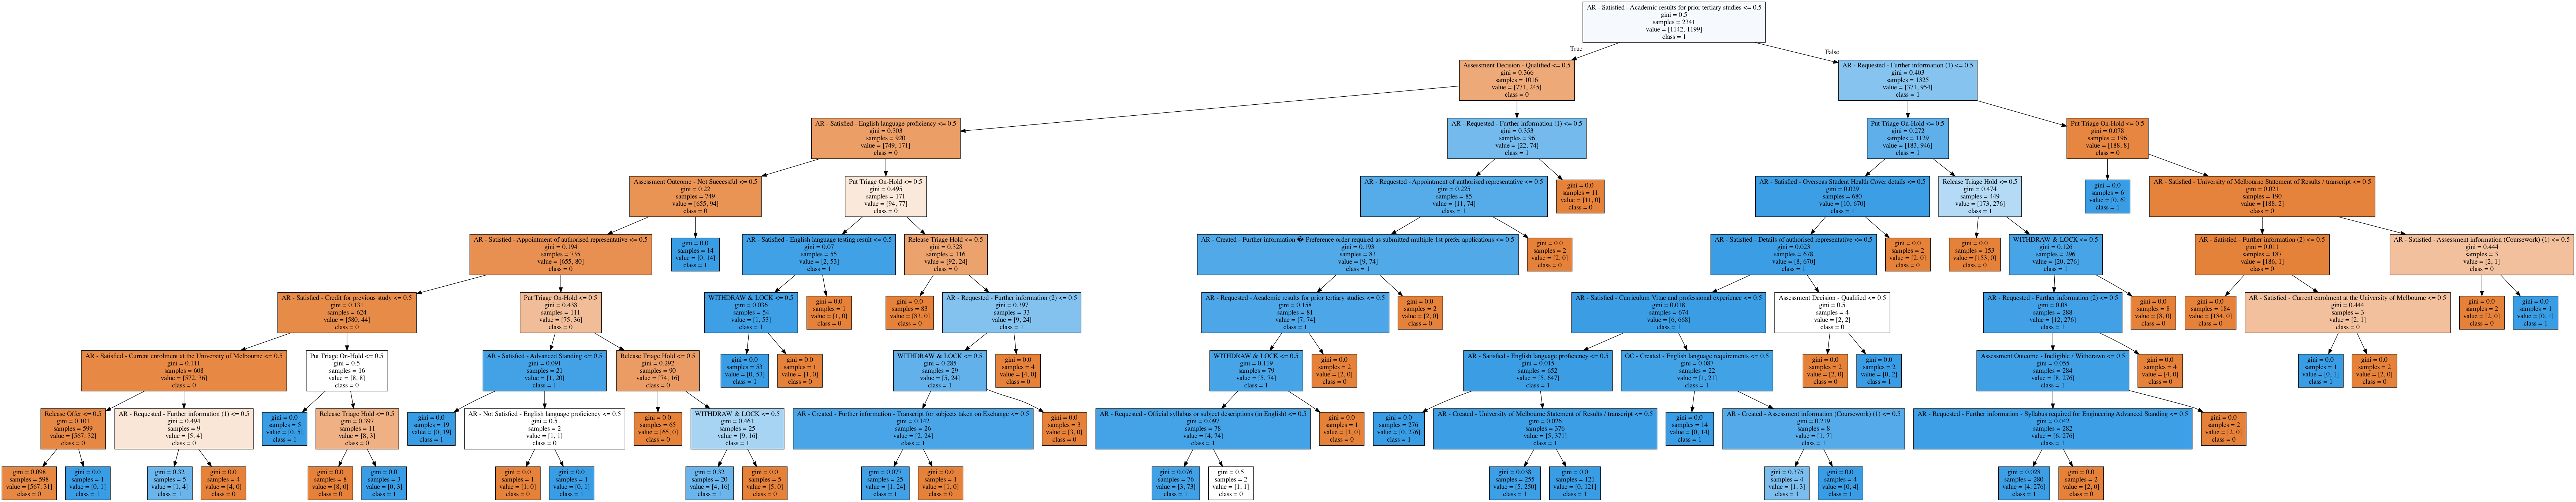

In [27]:
# Show graph
Image(graph.create_png())

In [28]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS1_decisiontree.png")




True

In [15]:
zero_one_table['Send for Assessment'].value_counts()

1    11217
0     1561
Name: Send for Assessment, dtype: int64

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Send for Assessment']==1]
zero_one_table_minority = df[zero_one_table['Send for Assessment']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=1561,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Send for Assessment'].value_counts()

1    1561
0    1561
Name: Send for Assessment, dtype: int64

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Send for Assessment'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9603072983354674


In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[407  12]
 [ 19 343]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       419
           1       0.97      0.95      0.96       362

    accuracy                           0.96       781
   macro avg       0.96      0.96      0.96       781
weighted avg       0.96      0.96      0.96       781



In [31]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

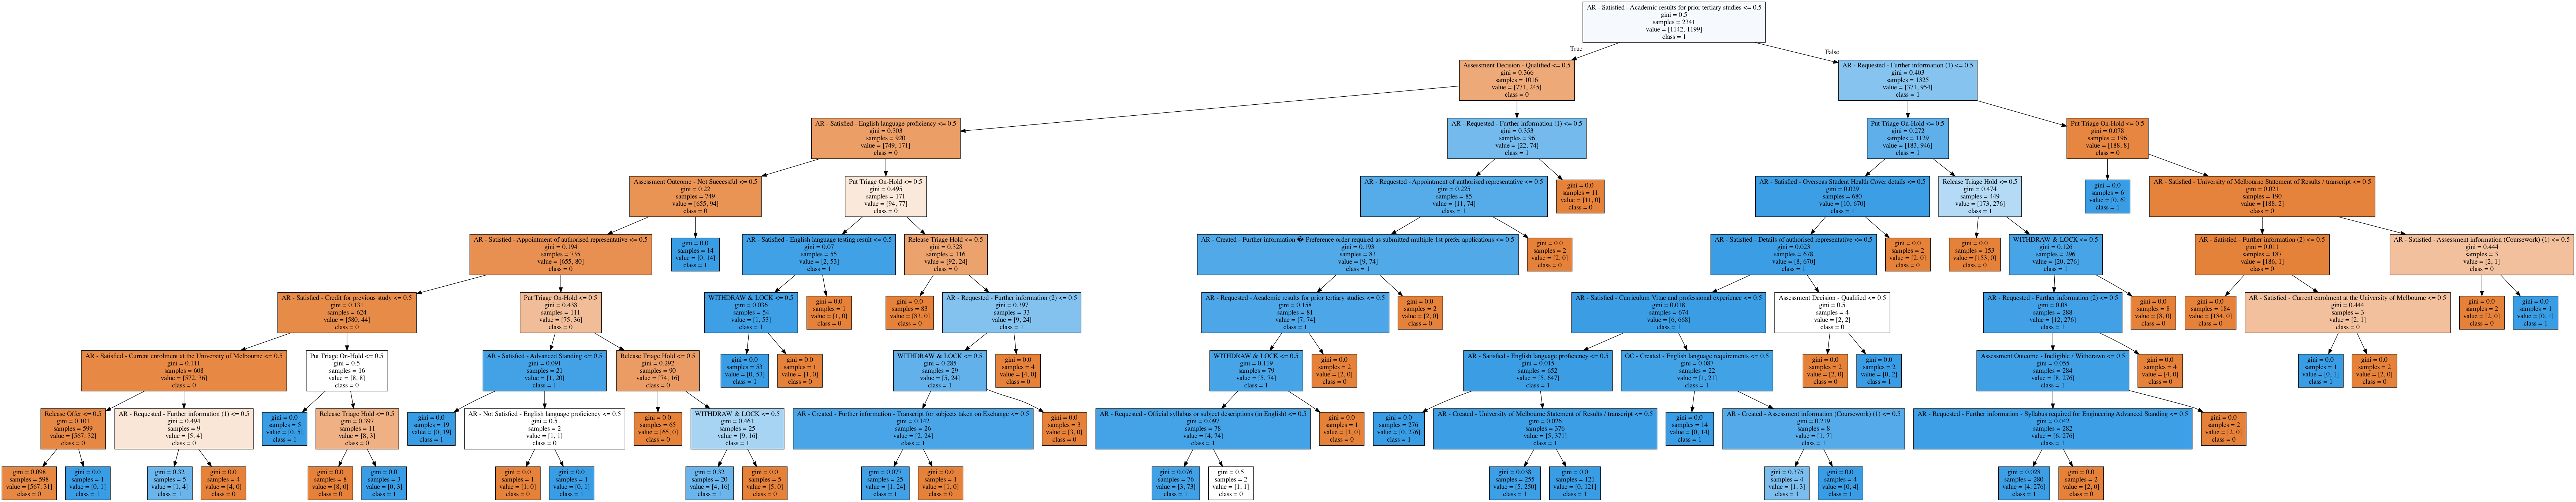

In [32]:
# Show graph
Image(graph.create_png())

In [33]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS1_decisiontree_downsampled.png")

True